In [150]:
import matplotlib
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)

In [151]:
import os
os.chdir('C:/pytest/')

In [152]:
# 읽기 함수 정의(전체 본문에 대해 id, doc, label을 중첩리스트 형태로 변환)
def read_data(filename, encoding='cp949', start=1):
    # with 구문의 장점 = close()가 자동으로 실행됨
    with open(filename, 'r', encoding=encoding) as f:
        # List Comprehension(캐리지 리턴으로 구분한 텍스트에서 tab으로 다시 문장을 나눔 -> 중첩리스트)
        data = [line.split('\t') for line in f.read().splitlines()]         
        data = data[start:] # 기본값 1은 txt 파일의 헤더(id document label)는 제외
    return data

def write_data(data, filename, encoding='cp949'): # 쓰기 함수도 정의
    with open(filename, 'w', encoding=encoding) as f:
        f.write(data)

data = read_data('ratings_small.txt' , encoding='cp949')

In [153]:
print(len(data))
print(len(data[0]))
print(data[0])
print(data[0:3])
print('첫번째 문장:', data[0][1])

500
3
['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1']
[['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1'], ['8132799', '"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다."', '1'], ['4655635', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '1']]
첫번째 문장: 어릴때보고 지금다시봐도 재밌어요ㅋㅋ


In [154]:
len_data = []
# d = ['id', '내용', 'label']
for d in data:
    len_data.append(len(d[1].split()))

print('첫번째 문장의 어절 길이:', len_data[0])

첫번째 문장의 어절 길이: 3


In [155]:
import numpy as np

print('텍스트 최대 길이: {}'.format(np.max(len_data)))
print('텍스트 최소 길이: {}'.format(np.min(len_data)))
print('텍스트 평균 길이: {:.2f}'.format(np.mean(len_data)))
print('텍스트 길이 표준편차: {:.2f}'.format(np.std(len_data)))
print('텍스트 중간 길이: {}'.format(np.median(len_data)))
print('제 1 사분위 텍스트 길이: {}'.format(np.percentile(len_data, 25)))
print('제 3 사분위 텍스트 길이: {}'.format(np.percentile(len_data, 75)))
print('최대: {}'.format(np.percentile(len_data, 95)))

텍스트 최대 길이: 36
텍스트 최소 길이: 1
텍스트 평균 길이: 7.51
텍스트 길이 표준편차: 6.53
텍스트 중간 길이: 6.0
제 1 사분위 텍스트 길이: 3.0
제 3 사분위 텍스트 길이: 9.0
최대: 23.0


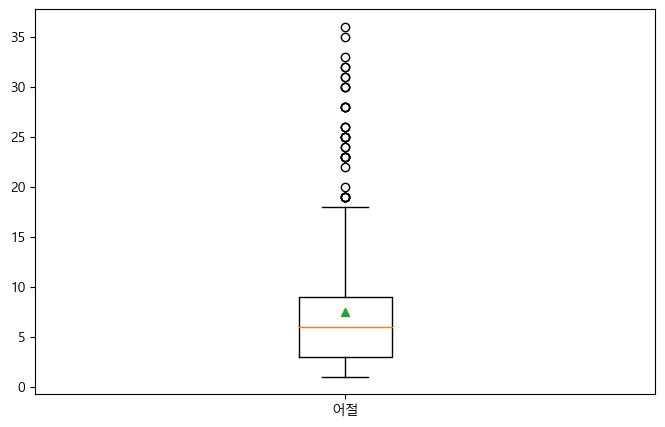

In [156]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 5))
plt.boxplot([len_data], labels = ['어절'], showmeans=True)
plt.show()

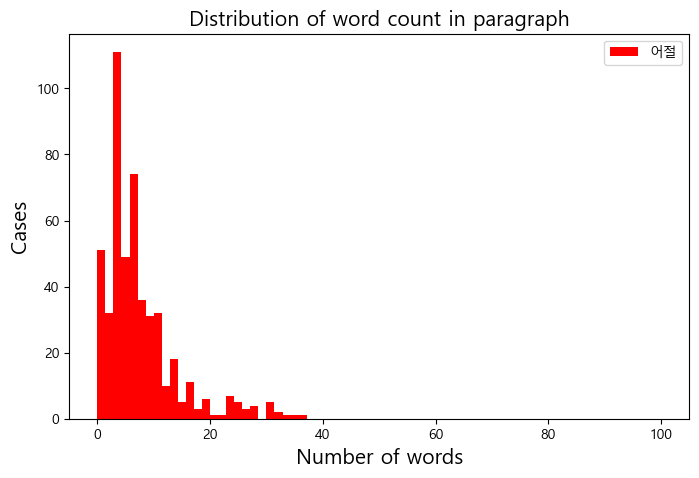

In [157]:
plt.figure(figsize=(8, 5))
plt.hist(len_data, bins=70, range=[0,100], facecolor='r', density=False, label='어절')
plt.title("Distribution of word count in paragraph", fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Cases', fontsize=15)
plt.show()

In [158]:
import rhinoMorph
rn = rhinoMorph.startRhino()
# 형태소 분석된 문장 샘플 보기. eomi=True 옵션 사용
sample_data = rhinoMorph.onlyMorph_list(rn, data[0][1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
print('sample data:', sample_data) # 형태소 분석 결과
print('joined sample data:', ' '.join(sample_data))

filepath:  c:\project\venv\lib\site-packages
classpath:  c:\project\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
sample data: ['어리다', '때', '보다', '지금', '다시', '보다', '재미있다', 'ㅋㅋ']
joined sample data: 어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ


In [159]:
morphed_data = ''
for data_each in data:
    morphed_data_each = rhinoMorph.onlyMorph_list(
        rn, data_each[1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi= True)
    joined_data_each = ' '.join(morphed_data_each) # 문자열을 하나로 연결
    if joined_data_each: # 내용이 있는 경우만 저장하게 함
        morphed_data += data_each[0]+"\t"+joined_data_each+"\t"+data_each[2]+"\n"
# 형태소 분석된 파일 저장
write_data(morphed_data, 'ratings_morphed.txt', encoding='cp949')

In [160]:
data = read_data('ratings_morphed.txt', encoding='cp949', start=0)
print(len(data)) # 495 (일부는 내용이 남지 않아 제외 됨)
print(len(data[0])) # 3개의 원소(컬럼)

data_text = [line[1] for line in data] # 데이터 본문
data_senti = [line[2] for line in data] # 데이터 긍부정 부분 (1은 긍정, 0은 부정)

495
3


In [161]:
len_data = []
for d in data_text:
    len_data.append(len(d.split()))

print('첫번째 문장의 형태소 길이:', len_data[0])

첫번째 문장의 형태소 길이: 8


In [162]:
print('텍스트 최대 길이: {}'.format(np.max(len_data)))
print('텍스트 최소 길이: {}'.format(np.min(len_data)))
print('텍스트 평균 길이: {:.2f}'.format(np.mean(len_data)))
print('텍스트 길이 표준편차: {:.2f}'.format(np.std(len_data)))
print('텍스트 중간 길이: {}'.format(np.median(len_data)))
print('제 1 사분위 텍스트 길이: {}'.format(np.percentile(len_data, 25)))
print('제 3 사분위 텍스트 길이: {}'.format(np.percentile(len_data, 75)))

텍스트 최대 길이: 38
텍스트 최소 길이: 1
텍스트 평균 길이: 8.94
텍스트 길이 표준편차: 7.29
텍스트 중간 길이: 7.0
제 1 사분위 텍스트 길이: 4.0
제 3 사분위 텍스트 길이: 11.0


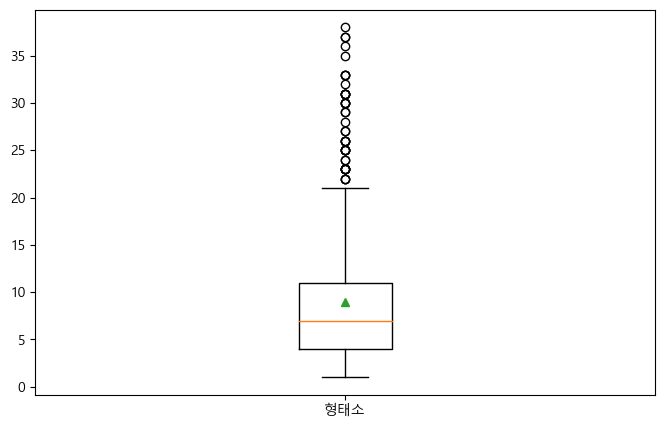

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 5))
plt.boxplot([len_data], labels = ['형태소'], showmeans=True)
plt.show()

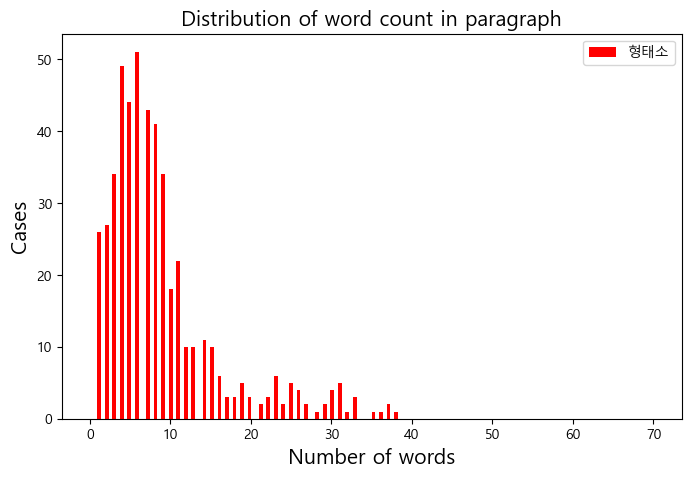

In [164]:
plt.figure(figsize=(8, 5))
plt.hist(len_data, bins=150, range=[0,70], facecolor='r', density=False, label='형태소')
plt.title("Distribution of word count in paragraph", fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Cases', fontsize=15)
plt.show()

In [165]:
# Counter = 빈도계산에 유용한 클래스
from collections import Counter
count = Counter(['여름', '과일', '봄', '딸기', '과일', '봄', '딸기', '봄'])
result = count.most_common(3) # 가장 빈도가 높은 어휘 3개만

print("count: ", count)
print('result: ', result)
print('result[0]: ', result[0])
print('result[0][0]: ', result[0][0])

print('result[0][1]: ', result[0][1])

count:  Counter({'봄': 3, '과일': 2, '딸기': 2, '여름': 1})
result:  [('봄', 3), ('과일', 2), ('딸기', 2)]
result[0]:  ('봄', 3)
result[0][0]:  봄
result[0][1]:  3


In [166]:
# 한 문장 단위초 나뉜 리스트를 바로 처리 시도하면 각 줄이 하나의 종류로 카운트됨

# data_text_freq = Counter(data_text)
# print('data_text:', data_text_freq)

In [167]:
# 공백을 추가하며 모든 리스트 요소들을 결합한 후 공백 단위로 분리하여 하나의 리스트로 만든다
mergedText = ' '.join(data_text)
# print('mergedText:', mergedText)

mergedTextList = mergedText.split(' ')
# print('mergedTextList:', mergedTextList)

In [168]:
stopwords_ko = ["하다", "있다", "되다", "그", "않다", "없다", "나", "말", "사람", "이", "보다", "한", "때", "년", "같다", "대하다",
"일", "이", "생각", "위하다", "때문", "그것", "그러나", "가다",
"받다", "그렇다", "알다", "사회", "더", "그녀", "문제", "오다", "그리고", "크다", "속"]
# mergedTextList_no_stopwords = mergedTextList 원소 중 불용어에 속하지 않는 원소들
mergedTextList_no_stopwords = [word for word in mergedTextList if not word in stopwords_ko]
# print('mergedTextList without stopwords:', mergedTextList_no_stopwords)
print('불용어 제거 전 길이:', len(mergedTextList))
print('불용어 제거 후 길이:', len(mergedTextList_no_stopwords))

mergedTextList = mergedTextList_no_stopwords

불용어 제거 전 길이: 4423
불용어 제거 후 길이: 3837


In [169]:
wordInfo = Counter(mergedTextList) # 하나의 리스트로 묶인 분리된 요소들을 카운트한다 (내림차순)
# print('wordInfo:', wordInfo)

In [170]:
sample = {'여름':1, '과일':2, '딸기':3}

print(sorted(sample))
print(sorted(sample, reverse = True)) # 역순으로 정렬
print(sorted(sample, key = sample.get, reverse = True)) # sample.get의 출력된 값을 기준으로 sample을 정렬

print(sorted(sample.values(), reverse = True)) # 값 부분만 출력하여 정렬

['과일', '딸기', '여름']
['여름', '딸기', '과일']
['딸기', '과일', '여름']
[3, 2, 1]


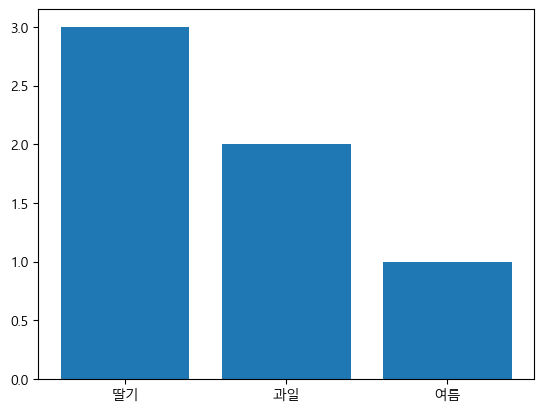

In [171]:
wordInfo_sample = Counter({'여름':1, '과일':2, '딸기':3})
sorted_keys_sample = sorted(wordInfo_sample, key=wordInfo_sample.get, reverse = True)
sorted_values_sample = sorted(wordInfo_sample.values(), reverse = True)

import matplotlib.pyplot as plt
plt.bar(range(len(wordInfo_sample)), sorted_values_sample)
plt.xticks(range(len(wordInfo_sample)), sorted_keys_sample)
plt.show()

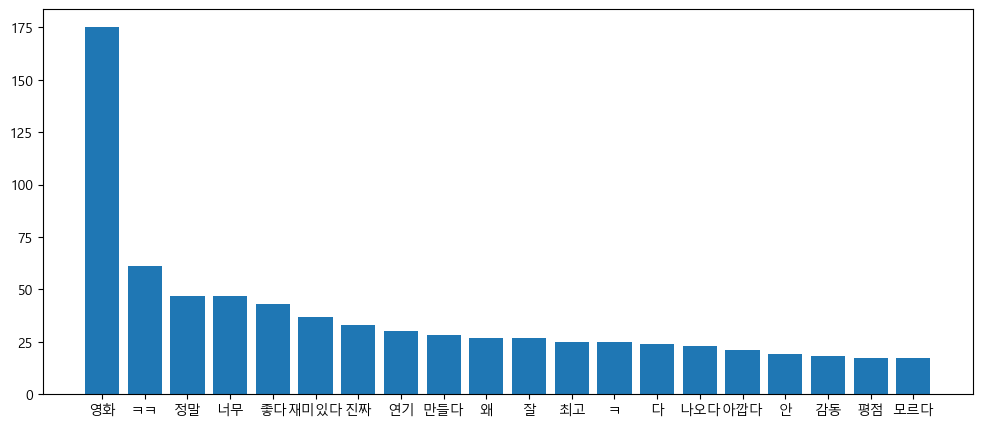

In [172]:
sorted_keys = sorted(wordInfo, key = wordInfo.get, reverse = True)
sorted_values = sorted(wordInfo.values(), reverse = True)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.bar(range(20), sorted_values[:20])
plt.xticks(range(20), sorted_keys[:20])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

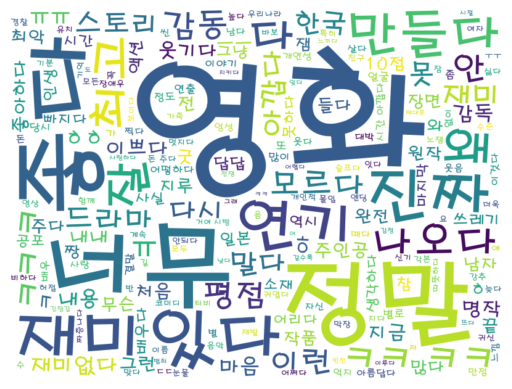

In [173]:
linedata = ' '.join(mergedTextList)
# print(linedata)
font_path = 'C:/Windows/Fonts/H2PORM.ttf'
from wordcloud import WordCloud
cloud = WordCloud(font_path = font_path, width=800, height = 600, background_color='white').generate(linedata)
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

In [182]:
import os
d = os.getcwd()
print(d)

import numpy as np
from PIL import Image
from os import path
alice_mask = np.array(Image.open(path.join(d, 'img3.png')))

C:\pytest


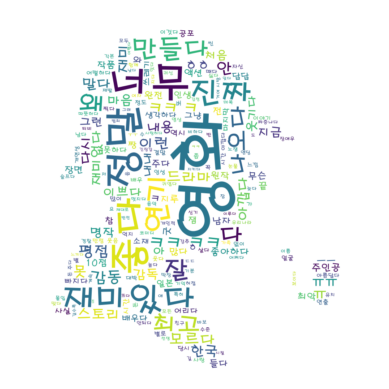

In [183]:
cloud = WordCloud(font_path = font_path, width = 1000, height = 1000, background_color = 'white', mask = alice_mask).generate(linedata)
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()